In [1]:
from scipy import stats
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/merged.csv')
df.columns

Index(['Zip Code', 'City', 'Pills', 'Tax Returns', 'AGI thousands',
       'Population', 'Death Rate'],
      dtype='object')

In [3]:
population = pd.DataFrame({
    'Pills': df['Pills'] / df['Population'],
    'Deaths': df['Death Rate']
})
w = population['Pills'] > population['Pills'].mean()
sample = population[w]

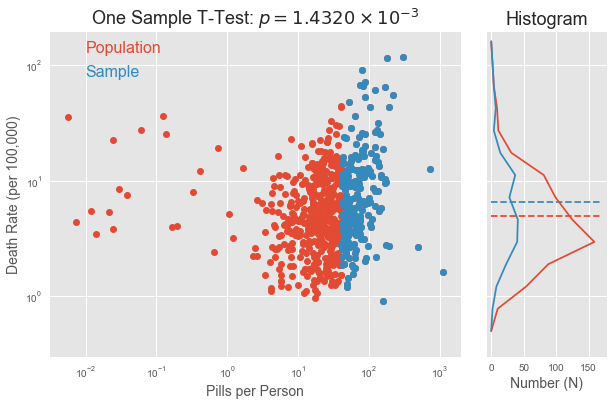

In [51]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 4)

plt.subplot(gs[0, :-1])
plt.plot(population['Pills'], population['Deaths'], 'o', label='Population')
plt.plot(sample['Pills'], sample['Deaths'], 'o', label='Sample')
plt.xscale('log')
plt.yscale('log')
plt.ylim(3e-1, 2e2)
plt.xlabel('Pills per Person', size=14)
plt.ylabel('Death Rate (per 100,000)', size=14)
plt.title(r'One Sample T-Test: $p=1.4320 \times 10^{-3}$', size=18)
plt.text(0.01, 130, 'Population', color='C0', size=16)
plt.text(0.01, 80, 'Sample', color='C1', size=16)

plt.subplot(gs[0, 3])
nbins = 15
vert_hist = np.histogram(population['Deaths'], bins=np.logspace(-0.3, 2.4, nbins))
plt.plot(vert_hist[0], vert_hist[1][:-1], '-')
vert_hist = np.histogram(sample['Deaths'], bins=np.logspace(-0.3, 2.4, nbins))
plt.plot(vert_hist[0], vert_hist[1][:-1], '-')
plt.yscale('log')
plt.yticks(np.logspace(0, 3, 4), ['']*3)
plt.ylim(3e-1, 2e2)
plt.xlabel('Number (N)', size=14)
plt.hlines(population['Deaths'].median(), 0, 170, color='C0', ls='--')
plt.hlines(sample['Deaths'].median(), 0, 170, color='C1', ls='--')
plt.title('Histogram', size=18)

plt.savefig('images/pill-rate-vs-death-rates.png', dpi=300)

In [44]:
stats.ttest_1samp(sample['Deaths'], population['Deaths'].mean())

Ttest_1sampResult(statistic=3.2312009539382527, pvalue=0.00143209342646343)